In [2]:
!pip install rouge

In [18]:
from rouge import Rouge
#Enter generated summary in hypothesis variable 
hypothesis = "google analytics google google and a google analytics ad ad neither herein important important customer customer may link information about your services activity your your from our ad services ."
#Enter Original reference text in refrence variable 
reference = " When you visit sites that use Google Analytics, Google and a Google Analytics customer may link information about your activity from that site with activity from other sites that use our ad services.We use information we collect, like your email address, to interact with you directly." 
rouge = Rouge()
scores = rouge.get_scores(hypothesis, reference)
print (scores)

[{'rouge-1': {'f': 0.363636358880081, 'p': 0.4666666666666667, 'r': 0.2978723404255319}, 'rouge-2': {'f': 0.21333332859022233, 'p': 0.27586206896551724, 'r': 0.17391304347826086}, 'rouge-l': {'f': 0.4905660331363475, 'p': 0.6842105263157895, 'r': 0.38235294117647056}}]


##Extracted Summary: 
When you use Twitter, even if you’re just looking at Tweets, we receive some personal information from you like the type of device you’re using and your IP address.In addition to information you share with us, we use your Tweets, content you’ve read, Liked, or Retweeted, and other information to determine what topics you’re interested in, your age, the languages you speak, and other signals to show you more relevant content.

##Original Text:
When you use Twitter, even if you’re just looking at Tweets, we receive some personal information from you like the type of device you’re using and your IP address. You can choose to share additional information with us like your email address, phone number, address book contacts, and a public profile. We use this information for things like keeping your account secure and showing you more relevant Tweets, people to follow, events, and ads.We give you control through your settings to limit the data we collect from you and how we use it, and to control things like account security, marketing preferences, apps that can access your account, and address book contacts you’ve uploaded to Twitter. You can also download information you have shared on Twitter. In addition to information you share with us, we use your Tweets, content you’ve read, Liked, or Retweeted, and other information to determine what topics you’re interested in, your age, the languages you speak, and other signals to show you more relevant content. We give you transparency into that information, and you can modify or correct it at any time."


In [38]:
#type(scores)
#scores[0]['rouge-1']['f']

0.5576923035872783

1) **SENTENCE:**
When you visit sites that use Google Analytics, Google and a Google Analytics customer may link information about your activity from that site with activity from other sites that use our ad services.We use information we collect, like your email address, to interact with you directly.

**Abtractive SUMMARY:**
google analytics google google and a google analytics ad ad neither herein important important customer customer may link information about your services activity your your from our ad services ."



2)
**SENTENCE:**
You can also visit the Privacy Checkup, which provides an opportunity to review and adjust important privacy settings.Browser settings: For example, you can configure your browser to indicate when Google has set a cookie in your browser.Remember, when you share information publicly, your content may become accessible through search engines, including Google Search.

**Abstractive SUMMARY:**
google cs google google and a google analytics cookie your content engines including google analytics analytics search to to to review review settingsbrowser settings which provides an opportunity to review when you share share  informatin.


3)
**SENTENCE:**
When you delete data, we follow a deletion process to make sure that your data is safely and completely removed from our servers or retained only in anonymized form.We maintain servers around the world and your information may be processed on servers located outside of the country where you live.We change this Privacy Policy from time to time.

**Abtsractive SUMMARY:**
data delete data we follow a deletion process to make sure that your data is safely and completely removed from our servers or retained only in anonymized formwe maintain servers around the world and your information may be processed on servers policy from time outside of the country .

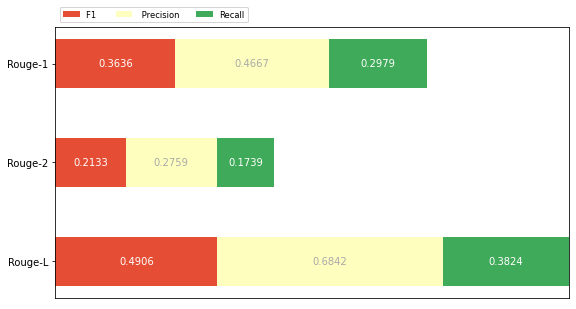

In [19]:
import numpy as np
import matplotlib.pyplot as plt

category_names = ['F1 ', ' Precision',
                  'Recall']
results = {
    'Rouge-1': [scores[0]['rouge-1']['f'], scores[0]['rouge-1']['p'], scores[0]['rouge-1']['r']],
    'Rouge-2': [scores[0]['rouge-2']['f'], scores[0]['rouge-2']['p'], scores[0]['rouge-2']['r']],
    'Rouge-L': [scores[0]['rouge-l']['f'], scores[0]['rouge-l']['p'], scores[0]['rouge-l']['r']]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))
    #print(data_cum)
    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, format(float(c),'.4f'), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()